# Exploratory Data Analysis(EDA) for Machine Learning

### Import packages

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../"))

from src import config
from utils import eda_utils

# ignore warnings ;)
import warnings
warnings.simplefilter("ignore")

# set random seed for reproducibily
import numpy as np
np.random.seed(2024)

### Import data

In [2]:
train, test, submission = eda_utils.import_data(
    config.ORIG_TRAIN_FILE, 
    config.TEST_FILE, 
    config.SAMPLE_FILE
    )

In [3]:
# List of numerical columns and categorical columns
target       = config.TARGET_COL
categ_cols   = train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train.select_dtypes(include=['float64']).columns.tolist()

print(f"Colonnes numériques: {numeric_cols}")
print(f"Colonnes numériques: {categ_cols}")
print(f"Target column: {target}")

Colonnes numériques: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
Colonnes numériques: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
Target column: Depression


### Basic exploration

In [4]:
eda_utils.print_first_rows(train, test, submission)

First few rows training set:
 id     Name Gender  Age          City Working Professional or Student Profession  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  Job Satisfaction    Sleep Duration Dietary Habits  Degree Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress Family History of Mental Illness  Depression
  0 Aaradhya Female 49.0      Ludhiana            Working Professional       Chef                NaN            5.0   NaN                 NaN               2.0 More than 8 hours        Healthy     BHM                                    No               1.0               2.0                               No           0
  1    Vivan   Male 26.0      Varanasi            Working Professional    Teacher                NaN            4.0   NaN                 NaN               3.0 Less than 5 hours      Unhealthy     LLB                                   Yes               7.0               3.0                               No           1
  2   Yuvra

In [5]:
eda_utils.print_shapes(train, test, submission)
eda_utils.print_duplicated(train, test, submission)

Shape of the data:
Training: (140700, 20) 
Test: (93800, 19) 
Submission: (93800, 2)


Number of duplicated values:


Training: 0 
Test: 0 
Submission: 0




### Missing values

In [6]:
eda_utils.print_missing(train)

Number of missing values by cols in             id      Name  Gender   Age           City  \
0            0  Aaradhya  Female  49.0       Ludhiana   
1            1     Vivan    Male  26.0       Varanasi   
2            2    Yuvraj    Male  33.0  Visakhapatnam   
3            3    Yuvraj    Male  22.0         Mumbai   
4            4      Rhea  Female  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya  Female  18.0      Ahmedabad   
140696  140696      Lata  Female  41.0      Hyderabad   
140697  140697   Aanchal  Female  24.0        Kolkata   
140698  140698    Prachi  Female  49.0       Srinagar   
140699  140699       Sai    Male  27.0          Patna   

       Working Professional or Student         Profession  Academic Pressure  \
0                 Working Professional               Chef                NaN   
1                 Working Professional            Teacher                NaN   
2                              Student 

In [7]:
eda_utils.print_missing(test)

Number of missing values by cols in            id     Name  Gender   Age           City  \
0      140700   Shivam    Male  53.0  Visakhapatnam   
1      140701    Sanya  Female  58.0        Kolkata   
2      140702     Yash    Male  53.0         Jaipur   
3      140703   Nalini  Female  23.0         Rajkot   
4      140704  Shaurya    Male  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya  Female  49.0         Jaipur   
93796  234496    Shlok    Male  29.0      Ahmedabad   
93797  234497    Rishi    Male  24.0  Visakhapatnam   
93798  234498   Eshita  Female  23.0         Kalyan   
93799  234499    Gauri  Female  43.0       Varanasi   

      Working Professional or Student              Profession  \
0                Working Professional                   Judge   
1                Working Professional  Educational Consultant   
2                Working Professional                 Teacher   
3                             Student      

### Univariate analysis

In [8]:
# Call the function on train
eda_utils.univariate_stats(train)

,Count,Missing,Unique,Dtype,IsNumeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
id,140700,0,140700,int64,True,0,70349.5,0,35174.75,70349.5,105524.25,140699,40616.735775,0.0,-1.2
CGPA,27898,112802,331,float64,True,8.04,7.658636,5.03,6.29,7.77,8.92,10.0,1.464466,-0.073636,-1.229219
Age,140700,0,43,float64,True,56.0,40.388621,18.0,29.0,42.0,51.0,60.0,12.384099,-0.217977,-1.149302
Work/Study Hours,140700,0,13,float64,True,10.0,6.252679,0.0,3.0,6.0,10.0,12.0,3.853615,-0.128169,-1.283424
Academic Pressure,27897,112803,5,float64,True,3.0,3.142273,1.0,2.0,3.0,4.0,5.0,1.380457,-0.133977,-1.163739
Work Pressure,112782,27918,5,float64,True,2.0,2.998998,1.0,2.0,3.0,4.0,5.0,1.405771,0.018515,-1.295189
Study Satisfaction,27897,112803,5,float64,True,4.0,2.94494,1.0,2.0,3.0,4.0,5.0,1.360197,0.011764,-1.225619
Job Satisfaction,112790,27910,5,float64,True,2.0,2.974404,1.0,2.0,3.0,4.0,5.0,1.416078,0.054361,-1.304939
Financial Stress,140696,4,5,float64,True,2.0,2.988983,1.0,2.0,3.0,4.0,5.0,1.413633,0.035603,-1.313662
Depression,140700,0,2,int64,True,0,0.181713,0,0.0,0.0,0.0,1,0.385609,1.650852,0.725321


In [9]:
# Call the function to check univariate stats on submission dataset
eda_utils.univariate_stats(test)

,Count,Missing,Unique,Dtype,IsNumeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
id,93800,0,93800,int64,True,140700,187599.5,140700,164149.75,187599.5,211049.25,234499,27077.871962,0.0,-1.2
CGPA,18766,75034,326,float64,True,8.04,7.674016,5.03,6.33,7.8,8.94,10.0,1.465056,-0.086895,-1.232831
Age,93800,0,44,float64,True,56.0,40.321685,18.0,29.0,42.0,51.0,60.0,12.39348,-0.206914,-1.154562
Work/Study Hours,93800,0,13,float64,True,10.0,6.247335,0.0,3.0,6.0,10.0,12.0,3.858191,-0.126205,-1.283987
Academic Pressure,18767,75033,5,float64,True,3.0,3.158576,1.0,2.0,3.0,4.0,5.0,1.386666,-0.156923,-1.170139
Work Pressure,75022,18778,5,float64,True,2.0,3.011797,1.0,2.0,3.0,4.0,5.0,1.403563,0.010378,-1.291932
Study Satisfaction,18767,75033,5,float64,True,4.0,2.939522,1.0,2.0,3.0,4.0,5.0,1.374242,0.018138,-1.245374
Job Satisfaction,75026,18774,5,float64,True,2.0,2.96092,1.0,2.0,3.0,4.0,5.0,1.41071,0.070178,-1.297725
Financial Stress,93800,0,5,float64,True,2.0,2.978763,1.0,2.0,3.0,4.0,5.0,1.414604,0.045516,-1.315578
Name,93800,0,374,object,False,Rohan,-,-,-,-,-,-,-,-,-


In [10]:
#categorical_cols_to_display = [""]
eda_utils.print_value_counts(train, categ_cols)
eda_utils.print_value_counts(test, categ_cols)

Number of values in each categorical column:
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64
Gender
Male      77464
Female    63236
Name: count, dtype: int64
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
N

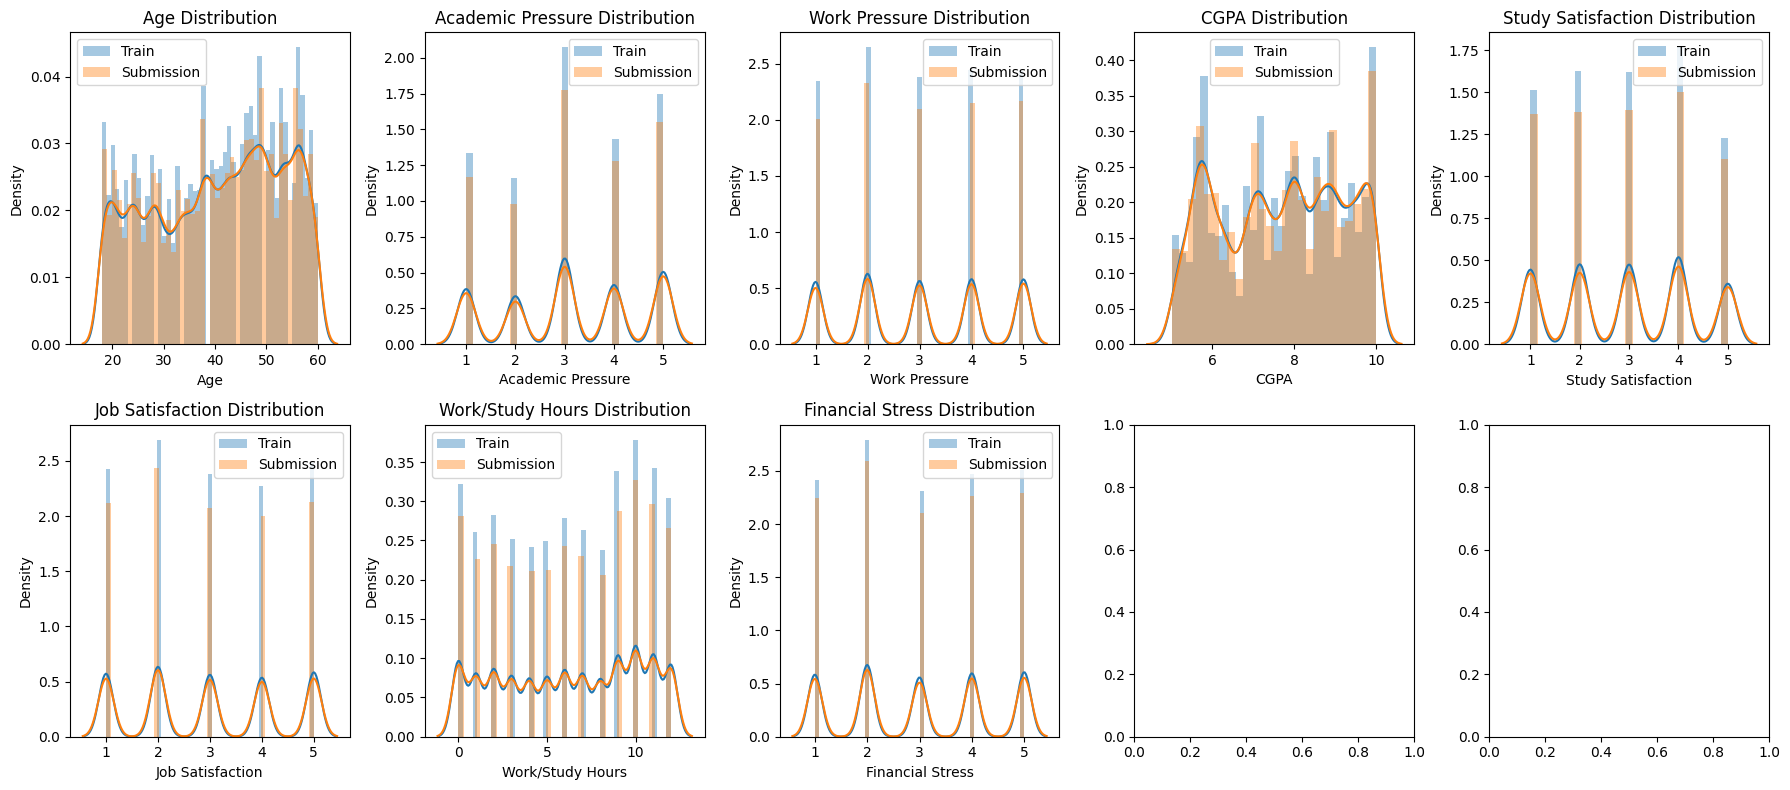

In [11]:
eda_utils.plot_histograms(train[numeric_cols], test[numeric_cols], target, n_cols=5)

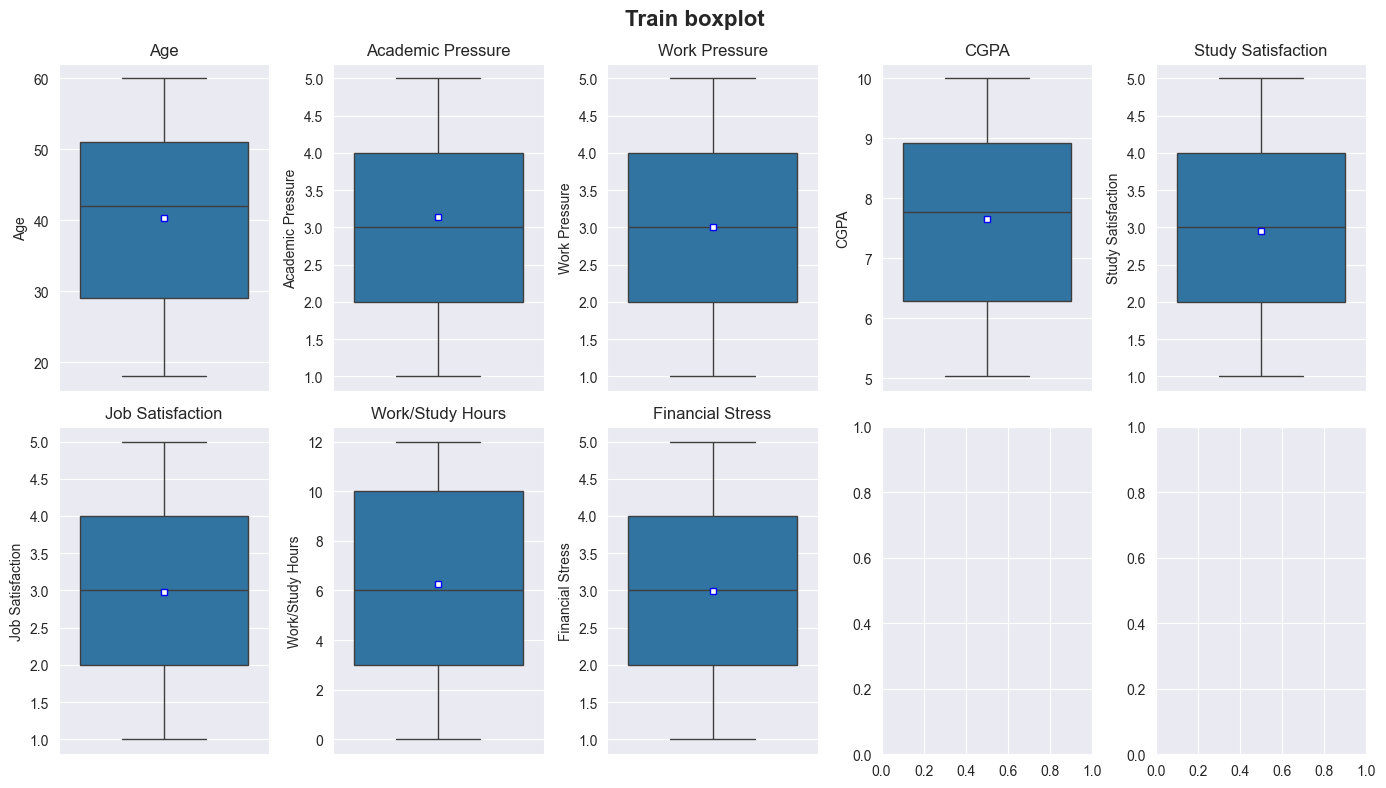

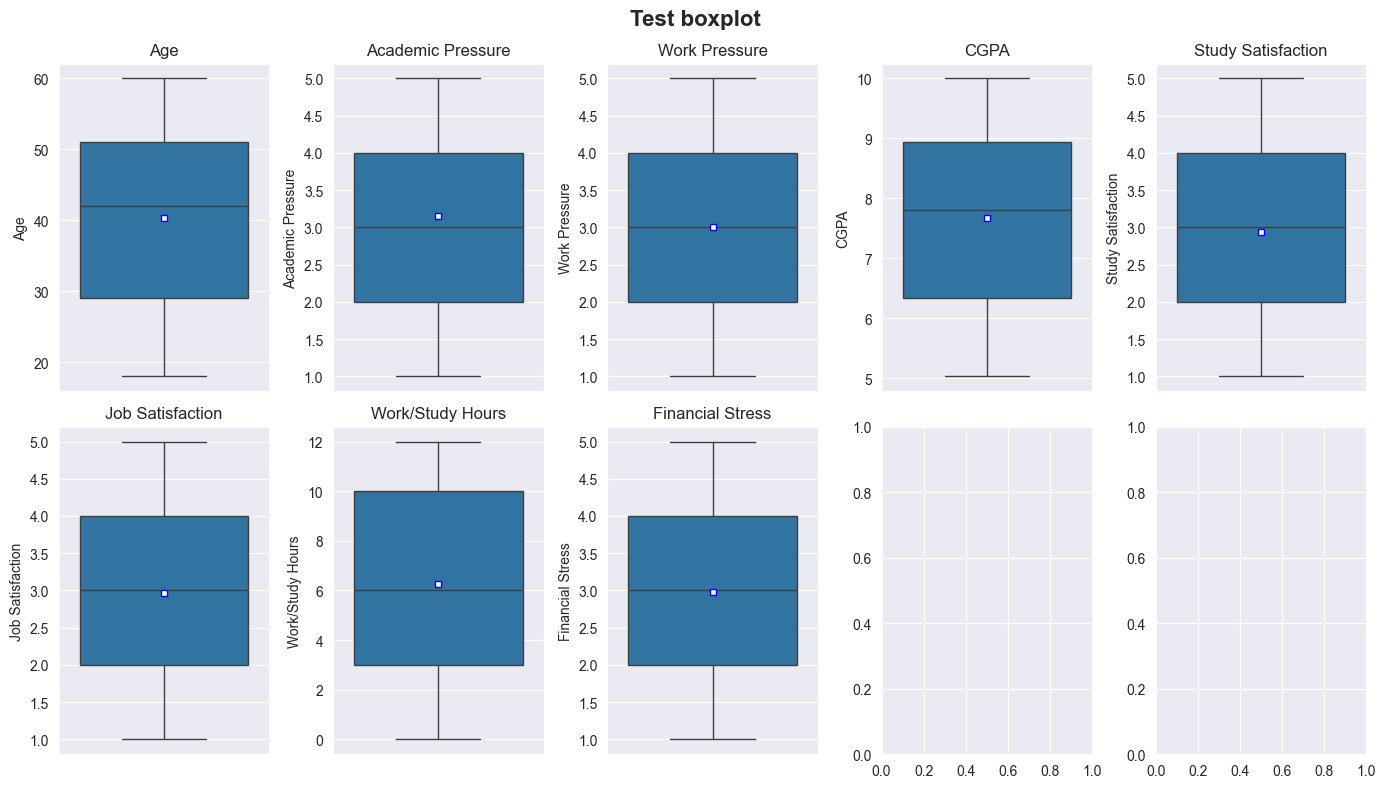

In [12]:
eda_utils.plot_boxplot(train[numeric_cols], title='Train', n_cols=5)
eda_utils.plot_boxplot(test[numeric_cols], title='Test', n_cols=5)

In [1]:
#eda_utils.plot_counts(train, categ_cols)
#eda_utils.plot_counts(test, categ_cols)

### Bivariate Analysis

In [14]:
eda_utils.bivstats(train)
eda_utils.bivstats(test)

KeyError: 'Depression'

In [ ]:
eda_utils.plot_corr_matrix(train, numeric_cols)
eda_utils.plot_corr_matrix(test, numeric_cols)

In [ ]:
# Call the function
#plot_scatter_with_fixed_col(df_all, fixed_col=target, size=16, title='Train+Test data')